<a href="https://colab.research.google.com/github/DigitalSocrates/DataScience/blob/master/Clustering_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using sklearn

In [ ]:
!pip install sklearn

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import pandas as pd

Let's load a dataset

In [6]:
# data location url
team_data = "https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_att_val_elo_win_housing.csv"
# read the csv and load the data into pandas DF
val_housing_win_df = pd.read_csv(team_data)
# get the columns to be used in the example
numerical_df = val_housing_win_df.loc[:,["TOTAL_ATTENDANCE_MILLIONS", "ELO", "VALUE_MILLIONS", "MEDIAN_HOME_PRICE_COUNTY_MILLIONS"]]

In [8]:
# let us what we have got
numerical_df.head()

,TOTAL_ATTENDANCE_MILLIONS,ELO,VALUE_MILLIONS,MEDIAN_HOME_PRICE_COUNTY_MILLIONS
0,0.888882,1519,2500,269900.0
1,0.811366,1420,1450,314990.0
2,0.721928,1393,1075,343950.0
3,0.805400,1569,1350,389000.0
4,0.813050,1600,1125,390000.0


Pipline time! Use Sklearn Pipeline and time it

In [9]:
%%timeit
# Fit to data and predict using pipelined scaling, KMeans.
std_clf = make_pipeline(StandardScaler(), KMeans(n_clusters=3))
kmeans = std_clf.fit(numerical_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

The slowest run took 18.24 times longer than the fastest. This could mean that an intermediate result is being cached.
171 ms ± 94.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Let us see what is under the "hood" of the new cluster using yellowbrick lib

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

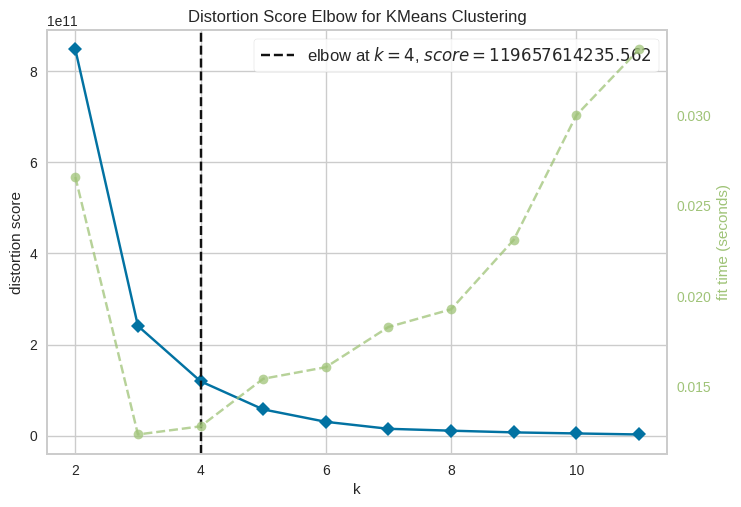

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(numerical_df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

Looked at the scaled version

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

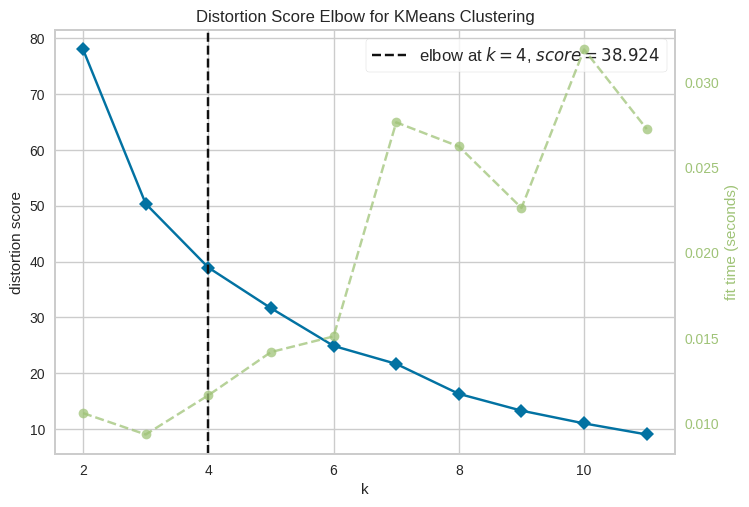

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# Instantiate the clustering model and visualizer
model = KMeans()
scaler = StandardScaler()
scaler.fit(numerical_df)
visualizer = KElbowVisualizer(model, k=(2,12))
# Fit the SCALED data to the visualizer
visualizer.fit(scaler.transform(numerical_df))
visualizer.poof()    # Draw/show/poof the data

Add silhouetter analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


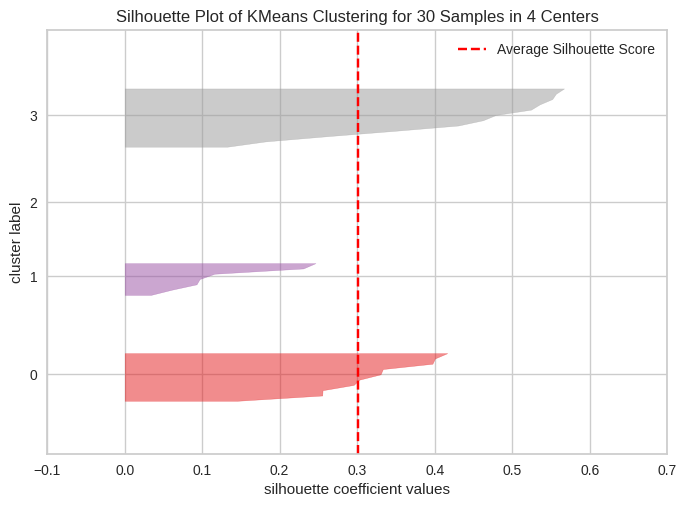

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
visualizer = SilhouetteVisualizer(KMeans(4))

visualizer.fit(scaler.transform(numerical_df)) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data


Yellowbrick Silhouette Visualizer-reference plot

Incorrect cluster selection

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


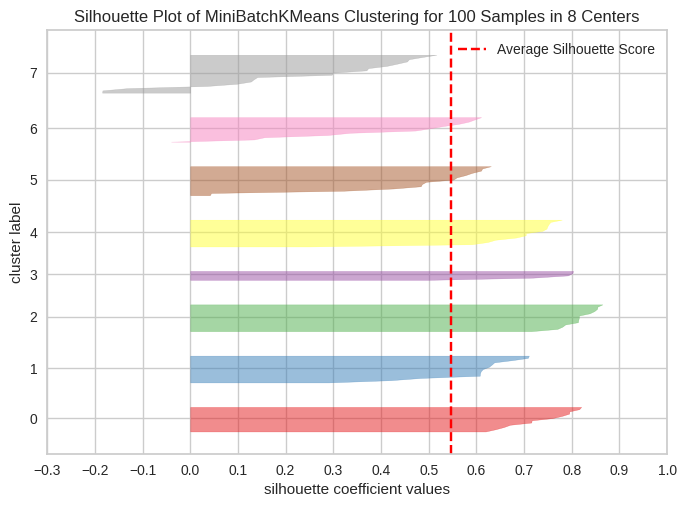

<Axes: title={'center': 'Silhouette Plot of MiniBatchKMeans Clustering for 100 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
from sklearn.cluster import MiniBatchKMeans

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs

# Make 8 blobs dataset
X, y = make_blobs(centers=8)

# Instantiate the clustering model and visualizer
model = MiniBatchKMeans(8)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data


K-Means Intercluster Distance Maps

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


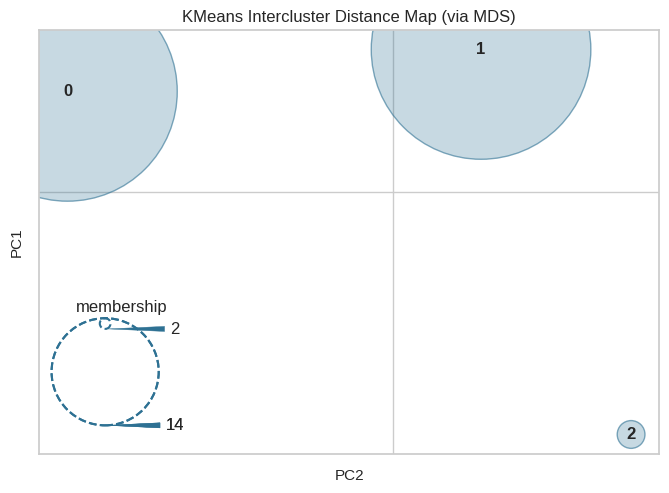

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [20]:
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(KMeans(3))

visualizer.fit(scaler.transform(numerical_df)) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

Yellowbrick Intercluster Distance Maps-reference plot

In [21]:
from sklearn.datasets import make_blobs

# Make 12 blobs dataset
X, y = make_blobs(centers=8, n_samples=1000, n_features=16, shuffle=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


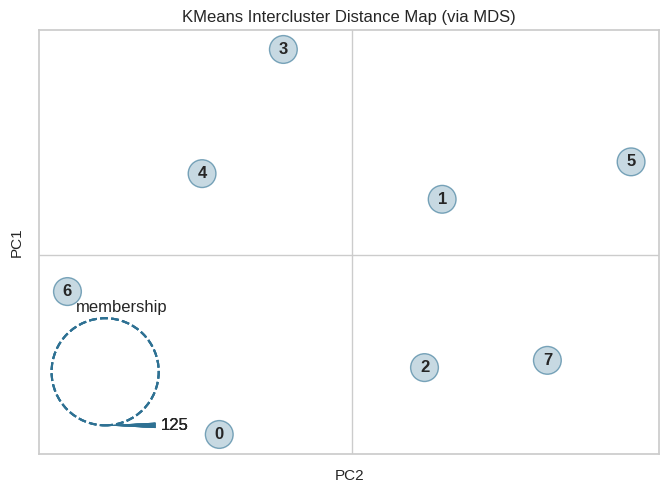

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [22]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(KMeans(8))

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

K-means Computational Challenges

In [23]:
%%time
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import time

def do_kmeans():
    """KMeans clustering on generated data"""

    X,_ = make_blobs(n_samples=100000, centers=3, n_features=10,
                random_state=0)
    kmeans = KMeans(n_clusters=3)
    t0 = time.time()
    kmeans.fit(X)
    print(f"KMeans cluster fit in {time.time()-t0}")

def run_serial():
    """Run Everything"""

    count = 25
    t0 = time.time()
    for _ in range(count):
        do_kmeans()

run_serial()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.7829568386077881


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.6368980407714844


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.38747143745422363


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.7551162242889404


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.46986818313598633


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.45604538917541504


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.6979379653930664


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.5854811668395996


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.5905413627624512


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.5375537872314453


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.6291015148162842


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.6762125492095947


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.9657702445983887


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.8050839900970459


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.9051847457885742


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.6032719612121582


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.7472734451293945


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.7557125091552734


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.36642956733703613


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.8194835186004639


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.8200395107269287


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.6831929683685303


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.5880532264709473


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.8478484153747559


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.5854015350341797
CPU times: user 20.2 s, sys: 10 s, total: 30.2 s
Wall time: 19.2 s


Run multiprocessing

In [24]:
import multiprocessing

multiprocessing.cpu_count()

2

In [ ]:
%%time
from multiprocessing import Pool
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import time

def do_kmeans(n_samples):
    """KMeans clustering on generated data"""

    X,_ = make_blobs(n_samples, centers=3, n_features=10,
                random_state=0)
    kmeans = KMeans(n_clusters=3)
    t0 = time.time()
    kmeans.fit(X)
    print(f"KMeans cluster fit in {time.time()-t0}")

def run_parallel():
    """Run Everything"""

    count = 25
    t0 = time.time()
    with Pool(10) as p:
        p.map(do_kmeans, [100000 for x in range(count)])
    print(f"Performed {count} KMeans in total time: {time.time()-t0}")

run_parallel()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Visualizing K-Means

Cluster using sklearn pipeline

In [ ]:

std_clf = make_pipeline(StandardScaler(), KMeans(n_clusters=3))
std_clf.fit(numerical_df)
kmeans_labels = std_clf.predict(numerical_df)
val_housing_win_df['cluster'] = kmeans_labels
val_housing_win_df.head()

Seaborn Faceted Plot #1: Facet by binary value, but color clusters

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(val_housing_win_df, col="CONF",
                  hue="cluster", palette="Set1")
g = (g.map(plt.scatter, "VALUE_MILLIONS", "ELO", **kws).add_legend())

In [ ]:

kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(val_housing_win_df, col="cluster",
                  hue="MEDIAN_HOME_PRICE_COUNTY_MILLIONS", palette="Reds",
                  col_wrap=3, height=2.5)
g = (g.map(plt.scatter, "VALUE_MILLIONS", "ELO", **kws).add_legend())


save file

In [ ]:
val_housing_win_df.to_csv("nba_teams_clustered.csv")